In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('dataset.xlsx')

In [ ]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 111 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 6   Hematocrit                                             603 non-null    float64
 7   Hemoglobin                                             603 non-null    float64
 8   Platelets                                      

In [ ]:
df.shape

(5644, 111)

In [ ]:
criteria = df.count() >= 1000
df_1000 = df[criteria.index[criteria]]

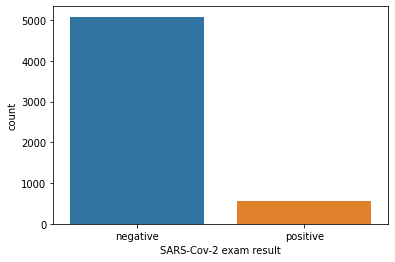

In [ ]:
sns.countplot(x='SARS-Cov-2 exam result', data=df)

In [ ]:
df_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient ID                                             5644 non-null   object
 1   Patient age quantile                                   5644 non-null   int64 
 2   SARS-Cov-2 exam result                                 5644 non-null   object
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64 
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64 
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64 
 6   Respiratory Syncytial Virus                            1354 non-null   object
 7   Influenza A                                            1354 non-null   object
 8   Influenza B                                            135

In [ ]:
df_1000.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
list = ['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)']
df_1000.drop(list, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_1000.head()

,Patient age quantile,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1,17,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
4,15,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
8,1,negative,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
9,17,negative,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
13,13,negative,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


In [ ]:
df_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352 entries, 1 to 5618
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Patient age quantile         1352 non-null   int64 
 1   SARS-Cov-2 exam result       1352 non-null   object
 2   Respiratory Syncytial Virus  1352 non-null   object
 3   Influenza A                  1352 non-null   object
 4   Influenza B                  1352 non-null   object
 5   Parainfluenza 1              1352 non-null   object
 6   CoronavirusNL63              1352 non-null   object
 7   Rhinovirus/Enterovirus       1352 non-null   object
 8   Coronavirus HKU1             1352 non-null   object
 9   Parainfluenza 3              1352 non-null   object
 10  Chlamydophila pneumoniae     1352 non-null   object
 11  Adenovirus                   1352 non-null   object
 12  Parainfluenza 4              1352 non-null   object
 13  Coronavirus229E              1352

In [ ]:
df_1000.replace({'negative': 0, 'positive': 1, 'not_detected': 0, 'detected': 1}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


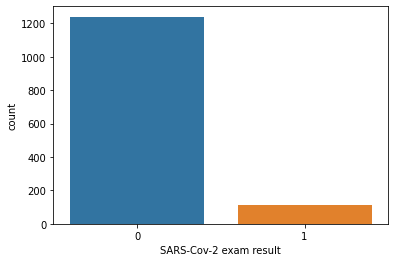

In [ ]:
sns.countplot(x='SARS-Cov-2 exam result', data=df_1000)

In [ ]:
df_1000['SARS-Cov-2 exam result'].value_counts()

0    1240
1     112
Name: SARS-Cov-2 exam result, dtype: int64

In [ ]:
neg = df_1000[df_1000['SARS-Cov-2 exam result'] == 0].sample(n = 112)
pos = df_1000[df_1000['SARS-Cov-2 exam result'] == 1]

In [ ]:
data = pd.concat([neg, pos])

In [ ]:
data

,Patient age quantile,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
1448,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
882,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
178,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
496,17,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4368,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5564,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5566,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5585,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


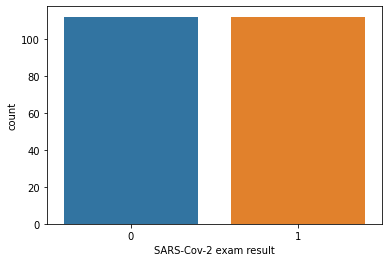

In [ ]:
sns.countplot(x='SARS-Cov-2 exam result', data=data)

In [ ]:
y = data['SARS-Cov-2 exam result']
X = data.drop('SARS-Cov-2 exam result', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.dual_coef_

array([[-1.        , -1.        , -0.56925229, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -0.75290223, -1.        ,
        -1.        , -1.        , -1.        , -0.07238059, -1.        ,
        -1.        , -1.        , -1.        , -1.        , -0.07337564,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -0.08274496,
        -1.        , -1.        , -1.        , -1. 

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf = SVC()
scores_svc = cross_val_score(clf, X, y)

In [ ]:
print('Cross validation scores: {}'.format(scores_svc))
print('Average score: {:.2f}'.format(np.mean(scores_svc)))

Cross validation scores: [0.4        0.64444444 0.64444444 0.66666667 0.68181818]
Average score: 0.61


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
scores_knn = cross_val_score(clf, X, y)

In [ ]:
print('Cross validation scores: {}'.format(scores_knn))
print('Average score: {:.2f}'.format(np.mean(scores_knn)))

Cross validation scores: [0.53333333 0.64444444 0.62222222 0.57777778 0.65909091]
Average score: 0.61


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
scores_rfc = cross_val_score(clf, X, y)

In [ ]:
print('Cross validation scores: {}'.format(scores_rfc))
print('Average score: {:.2f}'.format(np.mean(scores_rfc)))

Cross validation scores: [0.66666667 0.6        0.75555556 0.73333333 0.70454545]
Average score: 0.69


In [ ]:
clf = RandomForestClassifier()
clf.fit(X, y)
estimator = clf.estimators_[0]

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='rfc_tree.dot',
                feature_names=X.columns,
                class_names = ['negative', 'positive'],
                rounded = True,
                proportion = False,
                precision = 2,
                filled = True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'rfc_tree.dot', '-o', 'rfc_tree.png', '-Gdpi=600'])

0